<a href="https://colab.research.google.com/github/berliandiwa/source-skripsi/blob/main/clustering_fixxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

Menggabungkan file dan membersihkan data

## Gabung File

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
import pandas as pd
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Untuk menggabungkan semua file pada satu array
listOfFrames = []
listed = drive.ListFile({'q': "'11JupFLXDBMsvX2VeokdU0a2lDT2rkIP7' in parents"}).GetList()
for file in listed:
  worksheet = gc.open_by_key(file['id']).sheet1
  rows = worksheet.get_all_values()
  df = pd.DataFrame.from_records(rows[1:], columns = rows[0])
  listOfFrames.append(df)

# Menggabungkan beberapa file
dataframes = pd.concat(listOfFrames)
dataframes

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Aug 30 14:46:48 +0000 2021,1432354117440004097,@ayvl astgaa hahaha kiraiin msib kulyah😭 btw c...,0,1,0,0,in,1413130978780794887,1432337999857995780,xijennieya,https://twitter.com/xijennieya/status/14323541...
1,Mon Aug 30 08:34:50 +0000 2021,1432260509063991296,[FIPHAL BERPRESTASI] 🎉🎊 Selamat kepada saudar...,0,1,0,0,in,3278302579,1432260509063991296,BEM_FIPHAL,https://twitter.com/BEM_FIPHAL/status/14322605...
2,Mon Aug 30 08:03:07 +0000 2021,1432252528788312065,"Pada tahun ini, total ada 18 mahasiswa UTI yan...",0,0,0,0,in,959271693981171713,1432252528788312065,rilislampung,https://twitter.com/rilislampung/status/143225...
3,Sat Aug 28 20:09:16 +0000 2021,1431710496600772608,MSIB Vol XXI Issue 058 ZULU Attachments https:...,0,0,0,0,et,3015285635,1431710496600772608,WBIAnola,https://twitter.com/WBIAnola/status/1431710496...
4,Sat Aug 28 16:23:38 +0000 2021,1431653712066347009,Banyak bgt ya anak unpad yang dpt msib,0,0,0,0,in,3607209192,1431653712066347009,lovenilaa,https://twitter.com/lovenilaa/status/143165371...
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Tue Aug 24 06:34:51 +0000 2021,1430055987851923462,Pengumuman Mahasiswa yang Diterima Program Mag...,0,0,0,0,in,988242042,1430055987851923462,VokasiUB,https://twitter.com/VokasiUB/status/1430055987...
62,Tue Aug 24 04:49:39 +0000 2021,1430029512369053699,Selamat kepada 22 mahasiswa #UntagSurabayaKer...,0,0,0,3,in,1489461356,1430029512369053699,UntagSurabaya,https://twitter.com/UntagSurabaya/status/14300...
63,Tue Aug 24 03:48:21 +0000 2021,1430014087874842656,13.272 Mahasiswa Ikuti Program Magang dan Stud...,0,0,0,0,in,902837643024539651,1430014087874842656,medcom_id,https://twitter.com/medcom_id/status/143001408...
64,Tue Aug 24 02:39:54 +0000 2021,1429996863571193856,Yasudah semoga 2021 ini aku juga ttp fokus sm ...,0,1,0,0,in,1323634570911080448,1429995179944005636,babibublue00,https://twitter.com/babibublue00/status/142999...


In [ ]:
# Mengatur ulang indeks
dataframes.reset_index()
dataframes.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Aug 30 14:46:48 +0000 2021,1432354117440004097,@ayvl astgaa hahaha kiraiin msib kulyah😭 btw c...,0,1,0,0,in,1413130978780794887,1432337999857995780,xijennieya,https://twitter.com/xijennieya/status/14323541...
1,Mon Aug 30 08:34:50 +0000 2021,1432260509063991296,[FIPHAL BERPRESTASI] 🎉🎊 Selamat kepada saudar...,0,1,0,0,in,3278302579,1432260509063991296,BEM_FIPHAL,https://twitter.com/BEM_FIPHAL/status/14322605...
2,Mon Aug 30 08:03:07 +0000 2021,1432252528788312065,"Pada tahun ini, total ada 18 mahasiswa UTI yan...",0,0,0,0,in,959271693981171713,1432252528788312065,rilislampung,https://twitter.com/rilislampung/status/143225...
3,Sat Aug 28 20:09:16 +0000 2021,1431710496600772608,MSIB Vol XXI Issue 058 ZULU Attachments https:...,0,0,0,0,et,3015285635,1431710496600772608,WBIAnola,https://twitter.com/WBIAnola/status/1431710496...
4,Sat Aug 28 16:23:38 +0000 2021,1431653712066347009,Banyak bgt ya anak unpad yang dpt msib,0,0,0,0,in,3607209192,1431653712066347009,lovenilaa,https://twitter.com/lovenilaa/status/143165371...


In [ ]:
# Melihat tipe data pada setiap kolom
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13236 entries, 0 to 65
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           13236 non-null  object
 1   id_str               13236 non-null  object
 2   full_text            13236 non-null  object
 3   quote_count          13236 non-null  object
 4   reply_count          13236 non-null  object
 5   retweet_count        13236 non-null  object
 6   favorite_count       13236 non-null  object
 7   lang                 13236 non-null  object
 8   user_id_str          13236 non-null  object
 9   conversation_id_str  13236 non-null  object
 10  username             13236 non-null  object
 11  tweet_url            13236 non-null  object
dtypes: object(12)
memory usage: 1.3+ MB


In [ ]:
# Mengubah tipe data pada kolom 'created_at' menjadi datetime
dataframes['created_at'] = pd.to_datetime(dataframes['created_at'])
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13236 entries, 0 to 65
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   created_at           13236 non-null  datetime64[ns, UTC]
 1   id_str               13236 non-null  object             
 2   full_text            13236 non-null  object             
 3   quote_count          13236 non-null  object             
 4   reply_count          13236 non-null  object             
 5   retweet_count        13236 non-null  object             
 6   favorite_count       13236 non-null  object             
 7   lang                 13236 non-null  object             
 8   user_id_str          13236 non-null  object             
 9   conversation_id_str  13236 non-null  object             
 10  username             13236 non-null  object             
 11  tweet_url            13236 non-null  object             
dtypes: datetime64[ns, UTC

In [ ]:
# Mengurutkan table berdasarkan tanggal dibuatnya tweet secara ascending
dataframes = dataframes.sort_values(by='created_at', ascending=True).reset_index()
dataframes.head()

,index,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,44,2021-06-09 03:51:33+00:00,1402473414128914435,@JapanMerchFess Hinata hoshino 550k msib,0,0,0,0,tl,1318789075579539457,1402471646338772996,kgymtobioo,https://twitter.com/kgymtobioo/status/14024734...
1,45,2021-06-09 09:59:19+00:00,1402565967842930693,Nendo kuroo msib 700an ada nggak ya😭,0,0,0,0,in,908113868722905088,1402565967842930693,yorozouya,https://twitter.com/yorozouya/status/140256596...
2,46,2021-06-09 23:13:28+00:00,1402765822863499268,MSIB!,0,0,0,0,ht,966060391431393283,1402765822863499268,CCAA09009559,https://twitter.com/CCAA09009559/status/140276...
3,28,2021-06-10 12:52:33+00:00,1402971952067661829,@NS_MSIB 桃太郎かよ！！笑,0,0,0,0,ja,976295856193204227,1402923488587837441,AKppopo,https://twitter.com/AKppopo/status/14029719520...
4,29,2021-06-10 13:55:44+00:00,1402987851025817600,@NS_MSIB 信頼関係ステキです😆,0,0,0,0,ja,976295856193204227,1402923488587837441,AKppopo,https://twitter.com/AKppopo/status/14029878510...


In [ ]:
# Menghapus kolom yang tidak digunakan
dataframes = dataframes.drop(columns=['id_str','quote_count','reply_count','retweet_count','favorite_count','lang','user_id_str','conversation_id_str','username','tweet_url'])
dataframes = dataframes.drop(columns='index')
dataframes.head()

,created_at,full_text
0,2021-06-09 03:51:33+00:00,@JapanMerchFess Hinata hoshino 550k msib
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭
2,2021-06-09 23:13:28+00:00,MSIB!
3,2021-06-10 12:52:33+00:00,@NS_MSIB 桃太郎かよ！！笑
4,2021-06-10 13:55:44+00:00,@NS_MSIB 信頼関係ステキです😆


## Cleaning Data

In [ ]:
!pip install -q pandasql
!pip install -q SQLAlchemy==1.4.46

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.


In [ ]:
from pandasql import sqldf

In [ ]:
dataframes.duplicated().sum()

345

In [ ]:
dataframes = dataframes.drop_duplicates()

In [ ]:
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12891 entries, 0 to 13235
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  12891 non-null  datetime64[ns, UTC]
 1   full_text   12891 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 302.1+ KB


In [ ]:
japan = '''
SELECT * FROM dataframes WHERE full_text LIKE '%Japan%'
'''

japan = sqldf(japan)

cleaning1 = dataframes[dataframes['full_text'].isin(japan['full_text'])]
cleaning1

,created_at,full_text
0,2021-06-09 03:51:33+00:00,@JapanMerchFess Hinata hoshino 550k msib
11,2021-06-15 09:43:05+00:00,@JapanMerchFess MSIB tapi prefer take all sih ...
12,2021-06-15 10:16:50+00:00,@JapanMerchFess aku ad ajual nder~ hinata hosh...
13,2021-06-15 10:41:14+00:00,"@JapanMerchFess MSIB tapi prefer take all, har..."
16,2021-06-17 09:59:55+00:00,@JapanMerchFess BIB harga lebih murah. ga akan...
...,...,...
8348,2023-02-09 09:37:39+00:00,@JapanMerchFess aku ada 400k msib dom bogor
8880,2023-02-24 18:37:25+00:00,@JapanMerchFess masih ada nendo daichi msib mi...
8884,2023-02-25 10:19:37+00:00,@JapanMerchFess Figurenya MSIB semua. Dom sura...
10963,2023-06-27 13:11:38+00:00,@JapanMerchFess ada nderr nendo anya msib bole...


In [ ]:
dataframes = dataframes.drop(labels=cleaning1.index, axis=0)
dataframes

,created_at,full_text
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭
2,2021-06-09 23:13:28+00:00,MSIB!
3,2021-06-10 12:52:33+00:00,@NS_MSIB 桃太郎かよ！！笑
4,2021-06-10 13:55:44+00:00,@NS_MSIB 信頼関係ステキです😆
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...
...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
cleaning2 = '''
SELECT * FROM dataframes WHERE full_text LIKE '%@msib_77%'
'''

cleaning2 = sqldf(cleaning2)
cleaning2 = dataframes[dataframes['full_text'].isin(cleaning2['full_text'])]
dataframes = dataframes.drop(labels=cleaning2.index, axis=0)
dataframes

,created_at,full_text
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭
2,2021-06-09 23:13:28+00:00,MSIB!
3,2021-06-10 12:52:33+00:00,@NS_MSIB 桃太郎かよ！！笑
4,2021-06-10 13:55:44+00:00,@NS_MSIB 信頼関係ステキです😆
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...
...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12787 entries, 1 to 13235
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  12787 non-null  datetime64[ns, UTC]
 1   full_text   12787 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 299.7+ KB


# Preprocessing Text

## Case Folding

In [ ]:
# case folding

import re
import string

dataframes['text_caseFolding'] = dataframes['full_text'].str.lower()

# Menghapus link, emoji, atau special karakter lainnya
def remove_tweet_special(text):
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  text = text.encode('ascii','replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://"," ")

dataframes['remove_specialChar']=dataframes['text_caseFolding'].apply(remove_tweet_special)

# Menghapus tanda baca
def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

dataframes['remove_tandabaca'] = dataframes['remove_specialChar'].apply(remove_punctuation)

# Menghapus angka
def remove_number(text):
  return re.sub(r"\d+", "", text)

dataframes['remove_angka'] = dataframes['remove_tandabaca'].apply(remove_number)

# Menghapus spasi lebih pada awal dan akhir data
def remove_whitespace_LT(text):
  return text.strip()

dataframes['remove_whitespace'] = dataframes['remove_angka'].apply(remove_whitespace_LT)

# Menghapus spasi yang berlebih
def remove_whitespace_multiple(text):
  return re.sub('\s+',' ',text)

dataframes['remove_whitespace_double'] = dataframes['remove_whitespace'].apply(remove_whitespace_multiple)

# Menghapus karakter tunggal
def remove_single_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

dataframes['remove_char_single'] = dataframes['remove_whitespace_double'].apply(remove_single_char)

dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya?,nendo kuroo msib 700an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya
2,2021-06-09 23:13:28+00:00,MSIB!,msib!,msib!,msib,msib,msib,msib,msib
3,2021-06-10 12:52:33+00:00,@NS_MSIB 桃太郎かよ！！笑,@ns_msib 桃太郎かよ！！笑,_msib ????????,msib,msib,msib,msib,msib
4,2021-06-10 13:55:44+00:00,@NS_MSIB 信頼関係ステキです😆,@ns_msib 信頼関係ステキです😆,_msib ??????????,msib,msib,msib,msib,msib
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...
...,...,...,...,...,...,...,...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
# Menghapus tweet yang cuma satu kata
index_msib = dataframes[dataframes['remove_char_single']=='msib'].index
dataframes = dataframes.drop(labels=index_msib,axis=0)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya?,nendo kuroo msib 700an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...
8,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee
9,2021-06-14 03:27:54+00:00,@NS_MSIB 主任さんwww その光景が2人とも可愛いですww,@ns_msib 主任さんwww その光景が2人とも可愛いですww,_msib ????www ?????2????????ww,msib www 2ww,msib www ww,msib www ww,msib www ww,msib www ww
10,2021-06-15 02:59:15+00:00,@NS_MSIB キャッキャしてる光景かわいいww なんて和むwww,@ns_msib キャッキャしてる光景かわいいww なんて和むwww,_msib ??????????????ww ?????www,msib ww www,msib ww www,msib ww www,msib ww www,msib ww www
...,...,...,...,...,...,...,...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
cleaning3 = "SELECT * FROM dataframes WHERE remove_char_single LIKE '%wts%'"
cleaning3 = sqldf(cleaning3)
cleaning3 = dataframes[dataframes['remove_char_single'].isin(cleaning3['remove_char_single'])]
dataframes = dataframes.drop(labels=cleaning3.index, axis=0)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya?,nendo kuroo msib 700an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...
8,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee
9,2021-06-14 03:27:54+00:00,@NS_MSIB 主任さんwww その光景が2人とも可愛いですww,@ns_msib 主任さんwww その光景が2人とも可愛いですww,_msib ????www ?????2????????ww,msib www 2ww,msib www ww,msib www ww,msib www ww,msib www ww
10,2021-06-15 02:59:15+00:00,@NS_MSIB キャッキャしてる光景かわいいww なんて和むwww,@ns_msib キャッキャしてる光景かわいいww なんて和むwww,_msib ??????????????ww ?????www,msib ww www,msib ww www,msib ww www,msib ww www,msib ww www
...,...,...,...,...,...,...,...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
cleaning4 = "SELECT * FROM dataframes WHERE full_text LIKE '%ns_msib%'"
cleaning4 = sqldf(cleaning4)
cleaning4 = dataframes[dataframes['full_text'].isin(cleaning4['full_text'])]
dataframes = dataframes.drop(labels=cleaning4.index, axis=0)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
1,2021-06-09 09:59:19+00:00,Nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya😭,nendo kuroo msib 700an ada nggak ya?,nendo kuroo msib 700an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya,nendo kuroo msib an ada nggak ya
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...
8,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee
15,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...
17,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib
...,...,...,...,...,...,...,...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
cleaning5 = "SELECT * FROM dataframes WHERE full_text LIKE '%nendo%'"
cleaning5 = sqldf(cleaning5)
cleaning5 = dataframes[dataframes['full_text'].isin(cleaning5['full_text'])]
dataframes = dataframes.drop(labels=cleaning5.index, axis=0)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
5,2021-06-11 17:31:40+00:00,The Coast Guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...,the coast guard will no longer enforce mask re...
8,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee
15,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...
17,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib
19,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...
...,...,...,...,...,...,...,...,...,...
13231,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
13232,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
13233,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
13234,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


In [ ]:
dataframes = dataframes.drop(labels=5,axis=0).reset_index()
dataframes = dataframes.drop(columns='index')
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...
...,...,...,...,...,...,...,...,...,...
12650,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...
12651,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...
12652,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pertemuan msib loh tapi ga bisa tidu...
12653,2023-08-30 21:16:35+00:00,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm,apa gausah ikut magang msib kali ya jdnya pmm


## Tokenizing

In [ ]:
# tokenizing

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

dataframes['tokenized'] = dataframes['remove_char_single'].apply(word_tokenize_wrapper)

dataframes.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]"
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s..."
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ..."
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l..."


## Normalisasi Bahasa

In [ ]:
kata_baku = eval(open("kamus_kata_baku.txt").read())
kata_baku

{'@': 'di',
 'abis': 'habis',
 'ad': 'ada',
 'adlh': 'adalah',
 'afaik': 'as far as i know',
 'ahaha': 'haha',
 'aj': 'saja',
 'ajep-ajep': 'dunia gemerlap',
 'ak': 'saya',
 'akika': 'aku',
 'akkoh': 'aku',
 'akuwh': 'aku',
 'alay': 'norak',
 'alow': 'halo',
 'ambilin': 'ambilkan',
 'ancur': 'hancur',
 'anjrit': 'anjing',
 'anter': 'antar',
 'ap2': 'apa-apa',
 'apasih': 'apa sih',
 'apes': 'sial',
 'aps': 'apa',
 'aq': 'saya',
 'aquwh': 'aku',
 'asbun': 'asal bunyi',
 'aseekk': 'asyik',
 'asekk': 'asyik',
 'asem': 'asam',
 'aspal': 'asli tetapi palsu',
 'astul': 'asal tulis',
 'ato': 'atau',
 'au ah': 'tidak mau tahu',
 'awak': 'saya',
 'ay': 'sayang',
 'ayank': 'sayang',
 'b4': 'sebelum',
 'bakalan': 'akan',
 'bandes': 'bantuan desa',
 'bangedh': 'banget',
 'banpol': 'bantuan polisi',
 'banpur': 'bantuan tempur',
 'basbang': 'basi',
 'bcanda': 'bercanda',
 'bdg': 'bandung',
 'begajulan': 'nakal',
 'beliin': 'belikan',
 'bencong': 'banci',
 'bentar': 'sebentar',
 'ber3': 'bertiga',
 'b

In [ ]:
def normalisasi_bahasa(text):
  pattern = re.compile(r'\b(' + '|'.join(kata_baku.keys())+r')\b')
  content = []
  for kata in text:
    normal_bahasa = pattern.sub(lambda x: kata_baku[x.group()],kata)
    content.append(normal_bahasa.lower())
  text = content
  return text

dataframes['normalized'] = dataframes['tokenized'].apply(normalisasi_bahasa)
dataframes.head(10)

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri..."
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s..."
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany..."
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l..."
5,2021-06-19 03:42:59+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l..."
6,2021-06-19 12:10:17+00:00,@oenx @PwndxRL @MsIB @xiw @rzjj_ check this out!,@oenx @pwndxrl @msib @xiw @rzjj_ check this out!,_ check this out!,check this out,check this out,check this out,check this out,check this out,"[check, this, out]","[periksa, this, out]"
7,2021-06-20 12:02:03+00:00,[ INFORMASI | FESTIVAL KAMPUS MERDEKA EDISI MA...,[ informasi | festival kampus merdeka edisi ma...,[ informasi | festival kampus merdeka edisi ma...,informasi festival kampus merdeka edisi maga...,informasi festival kampus merdeka edisi maga...,informasi festival kampus merdeka edisi magan...,informasi festival kampus merdeka edisi magang...,informasi festival kampus merdeka edisi magang...,"[informasi, festival, kampus, merdeka, edisi, ...","[informasi, festival, kampus, merdeka, edisi, ..."
8,2021-06-20 12:02:04+00:00,kamu sebagai mahasiswa bisa mendapatkan inform...,kamu sebagai mahasiswa bisa

## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

daftar_stopwords = stopwords.words('indonesian')
daftar_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
list_stopwords=eval(open('stopword.txt').read())

In [ ]:
daftar_stopwords.extend(list_stopwords)

In [ ]:
daftar_stopwords = set(daftar_stopwords)

def stopwords_removal(texts):
  return [text for text in texts if text not in daftar_stopwords]

dataframes['stopword_removal'] = dataframes['normalized'].apply(stopwords_removal)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized,stopword_removal
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri...",[bahasa inggris]
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, mahasiswa, semester, mendaftar]"
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]","[semoga, lolos]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany...","[paham, daftar, tidak ikut]"
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12650,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,"[ga, prnh, nyoba, magang, kampus, merdeka, di,...","[tidak, pernah, coba, magang, kampus, merdeka,...","[coba, organisasi]"
12651,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@zaracepmek heh gua taun depan bisa ikut msib ...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,heh gua taun depan bisa ikut msib klo keterima...,"[heh, gua, taun, depan, bisa, ikut, msib, klo,...","[heh, saya, tahun, depan, bisa, ikut, msib, ka...",[keterima]
12652,2023-08-30 18:41:18+00:00,Besok mau pertemuan msib loh tapi ga bisa tidu...,besok mau pert

## Stemming

In [ ]:
!pip install Sastrawi
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=2e45e6c0e2aadedfcc47ee872e14554fce274f9d025d050b4bb10a7ce3c48c03
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict={}

for document in dataframes['stopword_removal']:
  for term in document:
    if term not in term_dict:
      term_dict[term]=' '

for term in term_dict:
  term_dict[term]=stemmed_wrapper(term)
  print(term,":",term_dict[term])

def get_stemmed_term(document):
  return [term_dict[term] for term in document]

dataframes['stemming'] = dataframes['stopword_removal'].swifter.apply(get_stemmed_term)
dataframes.head()

Streaming output truncated to the last 5000 lines.
seandainya : anda
dimagang : magang
kabar : kabar
iseng : iseng
menyambungkan : sambung
ditahap : tahap
accord : accord
penawaran : tawar
lupa : lupa
tautan : taut
gambar : gambar
dapatkan : dapat
terbaru : baru
telegram : telegram
kerjamagang : kerjamagang
tolong : tolong
balas : balas
ketentuannya : tentu
asdos : asdos
mencukupi : cukup
mengerti : erti
jalur : jalur
karyawan : karyawan
mekanisme : mekanisme
daring : daring
asik : asik
punyaku : punya
diterimanya : terima
setauku : tau
tidak boleh : tidak boleh
instansi : instansi
jalan : jalan
menunggumu : tunggu
ide : ide
perusahaannya : usaha
pemerintahan : perintah
sekelas : kelas
tokopedia : tokopedia
kebilangnya : bilang
gede : gede
skripsi : skripsi
dikonversi : konversi
sebagai informasi : bagai informasi
setara : tara
dibayar : bayar
keren : keren
benci : benci
egois : egois
merata : rata
lebih baik : lebih baik
campur : campur
bantu : bantu
magangku : magang
bilangnya : bila

Pandas Apply:   0%|          | 0/12655 [00:00<?, ?it/s]

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized,stopword_removal,stemming
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri...",[bahasa inggris],[bahasa inggris]
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, mahasiswa, semester, mendaftar]","[izin, mahasiswa, semester, daftar]"
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]","[semoga, lolos]","[moga, lolos]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany...","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]"
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, aj..."


In [ ]:
# Melakukan iterasi tahap normalisasi karena beberapa data yang telah melewati stemming memiliki arti yang beda dari yang seharusnya
normalisasi_lagi = {"alam":"pengalaman", "anggur":"pengangguran", "neng":"senang", "anggur":"pengangguran","skill":"ketrampilan", "extend":"perpanjang","jobless":"pengangguran","form":"formulir",
                    "tanda tangan":"tandatangan", "kesempatam":"kesempatan","website":"web","ajar":"belajar","wawas":"wawasan","tri":"kementerian","angkat":"angkatan","alas":"alasan","tuju":"tujuan","layan":"layanan","kemdikbudristek":"kemendikbudristek"}

def normalisasi_bahasa2(text):
  pattern = re.compile(r'\b(' + '|'.join(normalisasi_lagi.keys())+r')\b')
  content = []
  for kata in text:
    normal_bahasa = pattern.sub(lambda x: normalisasi_lagi[x.group()],kata)
    content.append(normal_bahasa.lower())
  text = content
  return text

dataframes['stemming2'] = dataframes['stemming'].apply(normalisasi_bahasa2)
dataframes.head(10)

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized,stopword_removal,stemming,stemming2
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri...",[bahasa inggris],[bahasa inggris],[bahasa inggris]
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, mahasiswa, semester, mendaftar]","[izin, mahasiswa, semester, daftar]","[izin, mahasiswa, semester, daftar]"
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]","[semoga, lolos]","[moga, lolos]","[moga, lolos]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany...","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]"
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, aj...","[barata, lokasi, mahasiswa, daftar, dukung, be..."
5,2021-06-19 03:42:59+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, aj...","[barata, lokasi, mahasiswa, daftar, dukung, be..."
6,2021-06-19 12:10:17+00:00,@oenx @PwndxRL @MsIB @xiw @rzjj_ check this out!,@oenx @pwndxrl @msib @xiw @rzjj_ check this out!,_ check this out!,check this out,check this out,check this out,check this out,check this out,"[check, this, out]"

In [ ]:
daftar_stopwords2 = set(['on the way sedang di jalan','ada','kha','agus','rau','dan lain','tra','ya sudah', 'accord','bau', 'bar','studi independen',
                         'mana','nama','kenan', 'beasiswa','erti','makas','tidak ada','hari','bulan','dapat', 'tapak', 'mana','tahu','sama sekali','apa sih','tapa',
                         'sedang apa','apa','kayak','skripsi'])

def stopwords_removal2(texts):
  return [text for text in texts if text not in daftar_stopwords2]

dataframes['final'] = dataframes['stemming2'].apply(stopwords_removal2)
dataframes

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized,stopword_removal,stemming,stemming2,final
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri...",[bahasa inggris],[bahasa inggris],[bahasa inggris],[bahasa inggris]
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, mahasiswa, semester, mendaftar]","[izin, mahasiswa, semester, daftar]","[izin, mahasiswa, semester, daftar]","[izin, mahasiswa, semester, daftar]"
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]","[semoga, lolos]","[moga, lolos]","[moga, lolos]","[moga, lolos]"
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany...","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]"
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, aj...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12650,2023-08-30 15:20:40+00:00,@collegemenfess ga prnh nyoba magang kampus me...,@collegemenfess ga prnh nyoba magang kampus me...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,ga prnh nyoba magang kampus merdeka di perusah...,"[ga, prnh, nyoba, magang, kampus, merdeka, di,...","[tidak, pernah, coba, magang, kampus, merdeka,...","[coba, organisasi]","[coba, organisasi]","[coba, organisasi]","[coba, organisasi]"
12651,2023-08-30 16:47:43+00:00,@zaracepmek heh gua taun depan bisa ikut msib ...,@z

In [ ]:
# Menggabungkan kumpulan kata menjadi kalimat kembali
def join_text(texts):
  return ' '.join([text for text in texts])

dataframes['tweet_join'] = dataframes['final'].apply(join_text)
dataframes.head()

,created_at,full_text,text_caseFolding,remove_specialChar,remove_tandabaca,remove_angka,remove_whitespace,remove_whitespace_double,remove_char_single,tokenized,normalized,stopword_removal,stemming,stemming2,final,tweet_join
0,2021-06-13 14:21:21+00:00,@Ifachanuna_ Khusus kakak jgn la ahhh:. Bing m...,@ifachanuna_ khusus kakak jgn la ahhh:. bing m...,"_ khusus kakak jgn la ahhh:. bing msib 01 huwee""",khusus kakak jgn la ahhh bing msib 01 huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,khusus kakak jgn la ahhh bing msib huwee,"[khusus, kakak, jgn, la, ahhh, bing, msib, huwee]","[khusus, kakak, jangan, lah, ah, bahasa inggri...",[bahasa inggris],[bahasa inggris],[bahasa inggris],[bahasa inggris],bahasa inggris
1,2021-06-16 07:25:17+00:00,"@ditjendikti izin bertanya, apakah mahasiswa t...","@ditjendikti izin bertanya, apakah mahasiswa t...","izin bertanya, apakah mahasiswa tingkat 2 (smt...",izin bertanya apakah mahasiswa tingkat 2 smt 4...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt b...,izin bertanya apakah mahasiswa tingkat smt bis...,izin bertanya apakah mahasiswa tingkat smt bis...,"[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, bertanya, apakah, mahasiswa, tingkat, s...","[izin, mahasiswa, semester, mendaftar]","[izin, mahasiswa, semester, daftar]","[izin, mahasiswa, semester, daftar]","[izin, mahasiswa, semester, daftar]",izin mahasiswa semester daftar
2,2021-06-17 18:56:41+00:00,"Aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021😭","aamiin, smoga lulus msib 2021?",aamiin smoga lulus msib 2021,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,aamiin smoga lulus msib,"[aamiin, smoga, lulus, msib]","[aamiin, semoga, lolos, msib]","[semoga, lolos]","[moga, lolos]","[moga, lolos]","[moga, lolos]",moga lolos
3,2021-06-18 17:31:02+00:00,@collegemenfess Sorry tp aku krg paham sma per...,@collegemenfess sorry tp aku krg paham sma per...,sorry tp aku krg paham sma pertanyaan kamu ? s...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu so...,sorry tp aku krg paham sma pertanyaan kamu soa...,sorry tp aku krg paham sma pertanyaan kamu soa...,"[sorry, tp, aku, krg, paham, sma, pertanyaan, ...","[maaf, tapi, aku, kurang, paham, sama, pertany...","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]","[paham, daftar, tidak ikut]",paham daftar tidak ikut
4,2021-06-19 03:32:35+00:00,Nantinya Barata Indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,nantinya barata indonesia akan menjadi lokasi ...,"[nantinya, barata, indonesia, akan, menjadi, l...","[nantinya, barata, indonesia, akan, menjadi, l...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, aj...","[barata, lokasi, mahasiswa, daftar, dukung, be...","[barata, lokasi, mahasiswa, daftar, dukung, be...",barata lokasi mahasiswa daftar dukung belajar ...


In [ ]:
dataframes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12655 entries, 0 to 12654
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   created_at                12655 non-null  datetime64[ns, UTC]
 1   full_text                 12655 non-null  object             
 2   text_caseFolding          12655 non-null  object             
 3   remove_specialChar        12655 non-null  object             
 4   remove_tandabaca          12655 non-null  object             
 5   remove_angka              12655 non-null  object             
 6   remove_whitespace         12655 non-null  object             
 7   remove_whitespace_double  12655 non-null  object             
 8   remove_char_single        12655 non-null  object             
 9   tokenized                 12655 non-null  object             
 10  normalized                12655 non-null  object             
 11  stopword_remova

# Proses Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Percobaan pada parameter eps

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat = tf_idf.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf.get_feature_names_out()
sums = tfidf_mat.sum(axis=0)

data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf = pd.DataFrame(data, columns=['term','tfidf'])
table_tfidf = tfidf.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.1, min_samples=3).fit(table_tfidf)
clustering.labels_

table_tfidf['cluster'] = clustering.labels_
table_tfidf.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples11 = silhouette_samples(table_tfidf.iloc[:, :-1], table_tfidf['cluster'])
silhouette_avg11 = silhouette_samples11.mean()
print(f"Silhouette Score: {silhouette_avg11}")

Silhouette Score: 0.23462822507294231


In [ ]:
table_tfidf['cluster'].value_counts()

-1     202
 8      84
 3      76
 2      71
 7      66
 6      58
 13     26
 1      25
 20     20
 12     19
 5      16
 21     12
 9      11
 22     10
 11      9
 14      8
 24      7
 30      6
 26      5
 35      5
 16      5
 0       5
 34      4
 15      4
 32      4
 31      4
 19      3
 4       3
 36      3
 33      3
 28      3
 29      3
 27      3
 10      3
 25      3
 23      3
 17      3
 18      3
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf1 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat1 = tf_idf1.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf1.get_feature_names_out()
sums = tfidf_mat1.sum(axis=0)

data1 = []
for col, term in enumerate(terms):
    data1.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf1 = pd.DataFrame(data1, columns=['term','tfidf'])
table_tfidf1 = tfidf1.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=3).fit(table_tfidf1)
clustering.labels_

table_tfidf1['cluster'] = clustering.labels_
table_tfidf1.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples1 = silhouette_samples(table_tfidf1.iloc[:, :-1], table_tfidf1['cluster'])
silhouette_avg1 = silhouette_samples1.mean()
print(f"Silhouette Score: {silhouette_avg1}")

Silhouette Score: 0.2547408296854873


In [ ]:
table_tfidf1['cluster'].value_counts()

 1     427
-1     152
 5      67
 11     29
 0      11
 8      10
 7      10
 4       9
 13      8
 10      8
 6       7
 14      7
 16      6
 17      6
 12      5
 2       5
 15      4
 18      4
 19      4
 22      4
 9       3
 3       3
 20      3
 21      3
 23      3
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf2 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat2 = tf_idf2.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf2.get_feature_names_out()
sums = tfidf_mat2.sum(axis=0)

data2 = []
for col, term in enumerate(terms):
    data2.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf2 = pd.DataFrame(data2, columns=['term','tfidf'])
table_tfidf2 = tfidf2.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.3, min_samples=3).fit(table_tfidf2)
clustering.labels_

table_tfidf2['cluster'] = clustering.labels_
table_tfidf2.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples2 = silhouette_samples(table_tfidf2.iloc[:, :-1], table_tfidf2['cluster'])
silhouette_avg2 = silhouette_samples2.mean()
print(f"Silhouette Score: {silhouette_avg2}")

Silhouette Score: -0.0121709590905389


In [ ]:
table_tfidf2['cluster'].value_counts()

 0     574
-1     102
 7      20
 13     11
 5      10
 4       8
 1       8
 6       7
 19      5
 11      5
 20      5
 14      5
 17      5
 3       4
 10      4
 12      4
 16      3
 18      3
 9       3
 15      3
 8       3
 2       3
 21      3
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf3 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat3 = tf_idf3.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf3.get_feature_names_out()
sums = tfidf_mat3.sum(axis=0)

data3 = []
for col, term in enumerate(terms):
    data3.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf3 = pd.DataFrame(data3, columns=['term','tfidf'])
table_tfidf3 = tfidf3.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.4, min_samples=3).fit(table_tfidf3)
clustering.labels_

table_tfidf3['cluster'] = clustering.labels_
table_tfidf3.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples3 = silhouette_samples(table_tfidf3.iloc[:, :-1], table_tfidf3['cluster'])
silhouette_avg3 = silhouette_samples3.mean()
print(f"Silhouette Score: {silhouette_avg3}")

Silhouette Score: 0.4194851137415997


In [ ]:
table_tfidf3['cluster'].value_counts()

 0     577
-1      92
 10     23
 4      11
 6      10
 8       9
 5       8
 1       8
 12      7
 7       6
 18      5
 16      5
 14      5
 9       5
 13      4
 3       4
 19      4
 11      3
 20      3
 15      3
 17      3
 2       3
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf4 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat4 = tf_idf4.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf4.get_feature_names_out()
sums = tfidf_mat4.sum(axis=0)

data4 = []
for col, term in enumerate(terms):
    data4.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf4 = pd.DataFrame(data4, columns=['term','tfidf'])
table_tfidf4 = tfidf4.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=3).fit(table_tfidf4)
clustering.labels_

table_tfidf4['cluster'] = clustering.labels_
table_tfidf4.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples4 = silhouette_samples(table_tfidf4.iloc[:, :-1], table_tfidf4['cluster'])
silhouette_avg4 = silhouette_samples4.mean()
print(f"Silhouette Score: {silhouette_avg4}")

Silhouette Score: 0.42643931896442955


In [ ]:
table_tfidf4['cluster'].value_counts()

 0     600
-1      74
 1      24
 4      10
 7      10
 3       8
 12      7
 14      7
 10      7
 6       6
 16      5
 8       5
 9       5
 18      4
 11      4
 2       4
 13      3
 17      3
 5       3
 15      3
 19      3
 20      3
Name: cluster, dtype: int64

## Percobaan pada parameter min_pts

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf5 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat5 = tf_idf5.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf5.get_feature_names_out()
sums = tfidf_mat5.sum(axis=0)

data5 = []
for col, term in enumerate(terms):
    data5.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf5 = pd.DataFrame(data5, columns=['term','tfidf'])
table_tfidf5 = tfidf5.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=4).fit(table_tfidf5)
clustering.labels_

table_tfidf5['cluster'] = clustering.labels_
table_tfidf5.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples5 = silhouette_samples(table_tfidf5.iloc[:, :-1], table_tfidf5['cluster'])
silhouette_avg5 = silhouette_samples5.mean()
print(f"Silhouette Score: {silhouette_avg5}")

Silhouette Score: 0.40855245418050373


In [ ]:
table_tfidf5['cluster'].value_counts()

 0     600
-1      94
 1      20
 4      10
 6      10
 3       8
 8       7
 10      7
 5       6
 11      6
 7       5
 12      5
 15      4
 2       4
 13      4
 9       4
 14      4
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf6 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat6 = tf_idf6.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf6.get_feature_names_out()
sums = tfidf_mat5.sum(axis=0)

data6 = []
for col, term in enumerate(terms):
    data6.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf6 = pd.DataFrame(data6, columns=['term','tfidf'])
table_tfidf6 = tfidf6.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=5).fit(table_tfidf6)
clustering.labels_

table_tfidf6['cluster'] = clustering.labels_
table_tfidf6.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples6 = silhouette_samples(table_tfidf6.iloc[:, :-1], table_tfidf6['cluster'])
silhouette_avg6 = silhouette_samples6.mean()
print(f"Silhouette Score: {silhouette_avg6}")

Silhouette Score: 0.37387660988668103


In [ ]:
table_tfidf6['cluster'].value_counts()

 0     600
-1     117
 1      10
 2      10
 4      10
 6      10
 3       8
 7       7
 5       6
 9       5
 11      5
 10      5
 8       5
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf7 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat7 = tf_idf7.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf7.get_feature_names_out()
sums = tfidf_mat7.sum(axis=0)

data7 = []
for col, term in enumerate(terms):
    data7.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf7 = pd.DataFrame(data7, columns=['term','tfidf'])
table_tfidf7 = tfidf7.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=6).fit(table_tfidf7)
clustering.labels_

table_tfidf7['cluster'] = clustering.labels_
table_tfidf7.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples7 = silhouette_samples(table_tfidf7.iloc[:, :-1], table_tfidf7['cluster'])
silhouette_avg7 = silhouette_samples7.mean()
print(f"Silhouette Score: {silhouette_avg7}")

Silhouette Score: 0.34479541100057715


In [ ]:
table_tfidf7['cluster'].value_counts()

 0    599
-1    140
 1     10
 6     10
 3     10
 5      9
 2      8
 4      6
 7      6
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf8 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat8 = tf_idf8.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf8.get_feature_names_out()
sums = tfidf_mat8.sum(axis=0)

data8 = []
for col, term in enumerate(terms):
    data8.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf8 = pd.DataFrame(data8, columns=['term','tfidf'])
table_tfidf8 = tfidf8.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=7).fit(table_tfidf8)
clustering.labels_

table_tfidf8['cluster'] = clustering.labels_
table_tfidf8.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples8 = silhouette_samples(table_tfidf8.iloc[:, :-1], table_tfidf8['cluster'])
silhouette_avg8 = silhouette_samples8.mean()
print(f"Silhouette Score: {silhouette_avg8}")

Silhouette Score: 0.34210556501946177


In [ ]:
table_tfidf8['cluster'].value_counts()

 0    596
-1    158
 5     10
 3     10
 1      9
 2      8
 4      7
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf9 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat9 = tf_idf9.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf9.get_feature_names_out()
sums = tfidf_mat9.sum(axis=0)

data9 = []
for col, term in enumerate(terms):
    data9.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf9 = pd.DataFrame(data9, columns=['term','tfidf'])
table_tfidf9 = tfidf9.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=8).fit(table_tfidf9)
clustering.labels_

table_tfidf9['cluster'] = clustering.labels_
table_tfidf9.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples9 = silhouette_samples(table_tfidf9.iloc[:, :-1], table_tfidf9['cluster'])
silhouette_avg9 = silhouette_samples9.mean()
print(f"Silhouette Score: {silhouette_avg9}")

Silhouette Score: 0.3409791886831828


In [ ]:
table_tfidf9['cluster'].value_counts()

 1    547
-1    166
 0     49
 5     10
 4     10
 2      8
 3      8
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf10 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat10 = tf_idf10.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf10.get_feature_names_out()
sums = tfidf_mat10.sum(axis=0)

data10 = []
for col, term in enumerate(terms):
    data10.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf10 = pd.DataFrame(data10, columns=['term','tfidf'])
table_tfidf10 = tfidf10.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=9).fit(table_tfidf10)
clustering.labels_

table_tfidf10['cluster'] = clustering.labels_
table_tfidf10.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples10 = silhouette_samples(table_tfidf10.iloc[:, :-1], table_tfidf10['cluster'])
silhouette_avg10 = silhouette_samples10.mean()
print(f"Silhouette Score: {silhouette_avg10}")

Silhouette Score: 0.3316106691025366


In [ ]:
table_tfidf10['cluster'].value_counts()

 1    548
-1    183
 0     47
 3     10
 2     10
Name: cluster, dtype: int64

In [ ]:
# Pemberian bobot pada setiap kata dengan TF-IDF
# Pembuatan metriks TF-IDF
tf_idf11 = TfidfVectorizer(min_df=10, binary=True)
tfidf_mat11 = tf_idf11.fit_transform(dataframes["tweet_join"]).toarray()

# Menjumlahkah bobot TF-IDF pada setiap kata
terms = tf_idf11.get_feature_names_out()
sums = tfidf_mat11.sum(axis=0)

data11 = []
for col, term in enumerate(terms):
    data11.append((term, sums[col] ))

# Membuat dataframe dari proses term dan tfidf
tfidf11 = pd.DataFrame(data11, columns=['term','tfidf'])
table_tfidf11 = tfidf11.drop(columns='term')

# Proses clustering
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=10).fit(table_tfidf11)
clustering.labels_

table_tfidf11['cluster'] = clustering.labels_
table_tfidf11.head()

# Penghitungan silhouette coefficient
from sklearn.metrics import silhouette_samples

silhouette_samples11 = silhouette_samples(table_tfidf11.iloc[:, :-1], table_tfidf11['cluster'])
silhouette_avg11 = silhouette_samples11.mean()
print(f"Silhouette Score: {silhouette_avg11}")

Silhouette Score: 0.25436330508415766


In [ ]:
table_tfidf11['cluster'].value_counts()

 1    535
-1    197
 0     24
 4     20
 2     12
 3     10
Name: cluster, dtype: int64

# Menghitung Frekuensi

In [ ]:
# Menggabungkan seluruh kata pada dataframes
word = ' '.join(dataframes['tweet_join'])
word

'bahasa inggris izin mahasiswa semester daftar moga lolos paham daftar tidak ikut barata lokasi mahasiswa daftar dukung belajar sertifikat barata lokasi mahasiswa daftar dukung belajar sertifikat periksa sertifikat rangkai acara acara mahasiswa lengkap sedia mitra kemendikbudristek laksana tanggal kapasitas daftar tutup tanggal daftar bawa suka sertifikat pengalaman gali minat organisasi favorit dengar langsung detail giat organisasi sempat daftar unggul sesuai minat ketrampilan rangkai acara acara mahasiswa lengkap sedia mitra kemendikbudristek lepas kkn semester tawar bikin merinding kerja langsung pantau youtube organisasi hadir tawar mahasiswa kerja  salah implementasi indikator kerja utama sertifikat kembang ketrampilan mampu teknik ketrampilan sertifikat cepat akselerasi pengalaman belajar rancang pengalaman profesi ikut kementerian didik budaya sosialisasi sertifikat daftar laksana tanggal platform akses kementerian didik budaya sosialisasi sertifikat daftar laksana tanggal plat

In [ ]:
words = []
words = word.split()
wfreq={word: words.count(word) for word in set(words)}
print(dict(zip(words,wfreq)))

{'bahasa': 'dal', 'inggris': 'partisipasi', 'izin': 'ribu', 'mahasiswa': 'juan', 'semester': 'kiat', 'daftar': 'kos', 'moga': 'serap', 'lolos': 'sumber', 'paham': 'wing', 'tidak': 'tahap', 'ikut': 'ats', 'barata': 'rektor', 'lokasi': 'tubi', 'dukung': 'lemari', 'belajar': 'tara', 'sertifikat': 'komunikasi', 'periksa': 'selenggara', 'rangkai': 'matang', 'acara': 'bimbang', 'lengkap': 'gantike', 'sedia': 'cium', 'mitra': 'akhirr', 'kemendikbudristek': 'hafal', 'laksana': 'demo', 'tanggal': 'improvisasi', 'kapasitas': 'cemburu', 'tutup': 'rancang', 'bawa': 'rakamin', 'suka': 'cerdas', 'pengalaman': 'bakat', 'gali': 'bot', 'minat': 'kecil', 'organisasi': 'tindak', 'favorit': 'dua', 'dengar': 'deteksi', 'langsung': 'iri', 'detail': 'selam', 'giat': 'nestle', 'sempat': 'siang', 'unggul': 'analisis', 'sesuai': 'uni', 'ketrampilan': 'siapa', 'lepas': 'jumat', 'kkn': 'mentor', 'tawar': 'lindas', 'bikin': 'hangus', 'merinding': 'utuh', 'kerja': 'partisipan', 'pantau': 'kering', 'youtube': 'angga

In [ ]:
word_freq_df = pd.DataFrame(list(wfreq.items()), columns=['terms', 'wfreq'])
word_freq_df.head()

,terms,wfreq
0,mobilisasi,42
1,anut,1
2,pupuk,1
3,nomor,14
4,talenta,2


In [ ]:
table_tfidf4

,tfidf,cluster
0,24.852783,0
1,24.545400,0
2,14.039784,0
3,32.260999,1
4,5.482363,0
...,...,...
793,20.053324,0
794,5.686676,0
795,10.170401,0
796,144.663605,-1


In [ ]:
table_tfidf4['terms'] = tfidf4['term']

In [ ]:
table_tfidf4

,tfidf,cluster,terms
0,24.852783,0,academy
1,24.545400,0,acara
2,14.039784,0,adil
3,32.260999,1,administrasi
4,5.482363,0,ahli
...,...,...,...
793,20.053324,0,wfo
794,5.686676,0,wujud
795,10.170401,0,youtube
796,144.663605,-1,zenius


In [ ]:
table_tfidf4 = table_tfidf4.merge(word_freq_df, left_on='terms',right_on='terms')
table_tfidf4.head()

,tfidf,cluster,terms,wfreq
0,24.852783,0,academy,52
1,24.545400,0,acara,61
2,14.039784,0,adil,28
3,32.260999,1,administrasi,72
4,5.482363,0,ahli,12


In [ ]:
table_tfidf4 = table_tfidf4.rename(columns={'wfreq':'frekuensi'})
table_tfidf4.head()

,tfidf,cluster,terms,frekuensi
0,24.852783,0,academy,52
1,24.545400,0,acara,61
2,14.039784,0,adil,28
3,32.260999,1,administrasi,72
4,5.482363,0,ahli,12


# Wordcloud

In [ ]:
import matplotlib.pyplot as plt

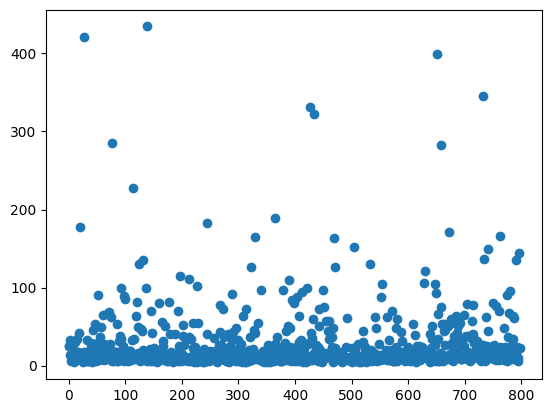

In [ ]:
plt.scatter(table_tfidf4.index, table_tfidf4['tfidf'])
plt.show()

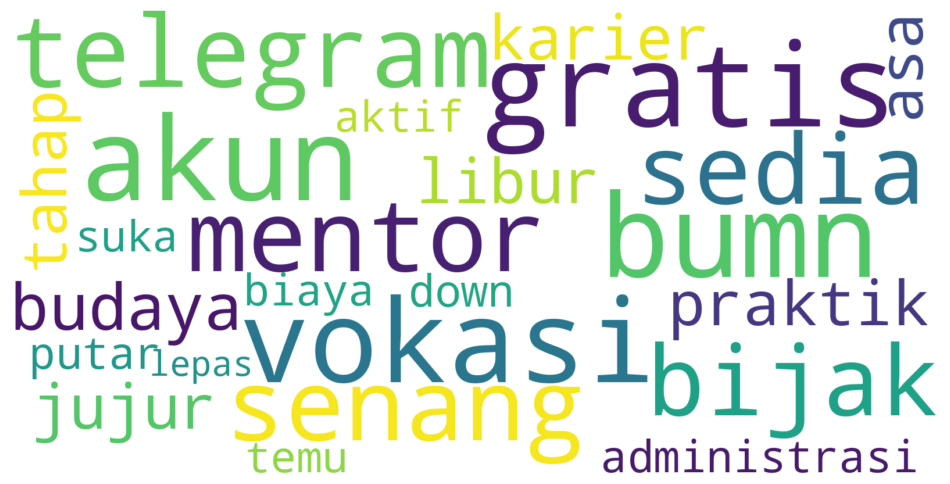

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==1]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


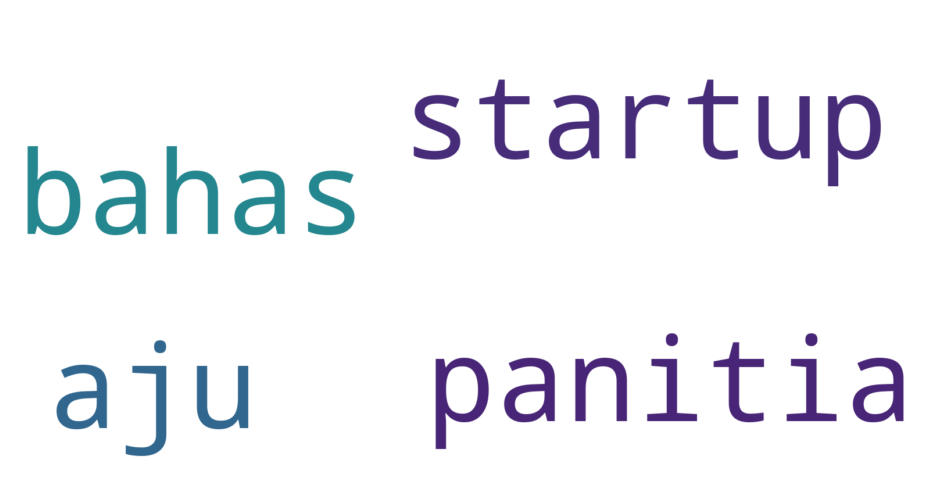

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==2]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

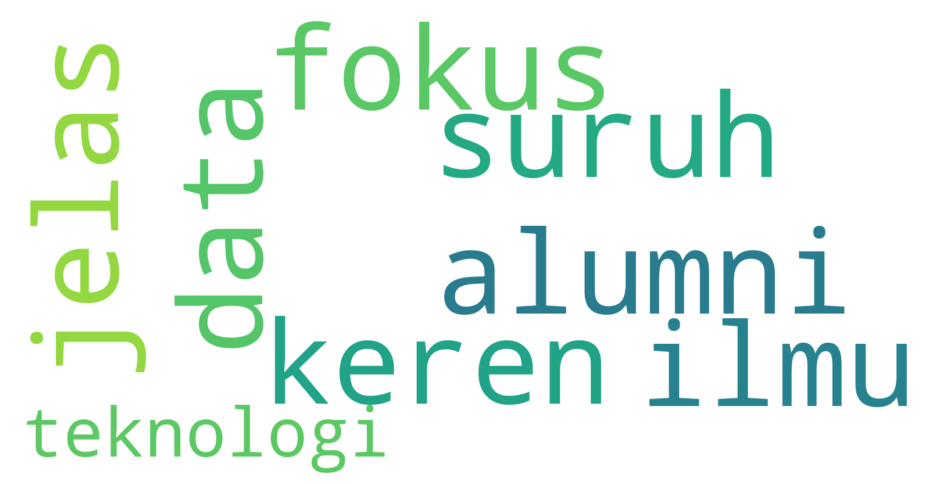

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==3]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

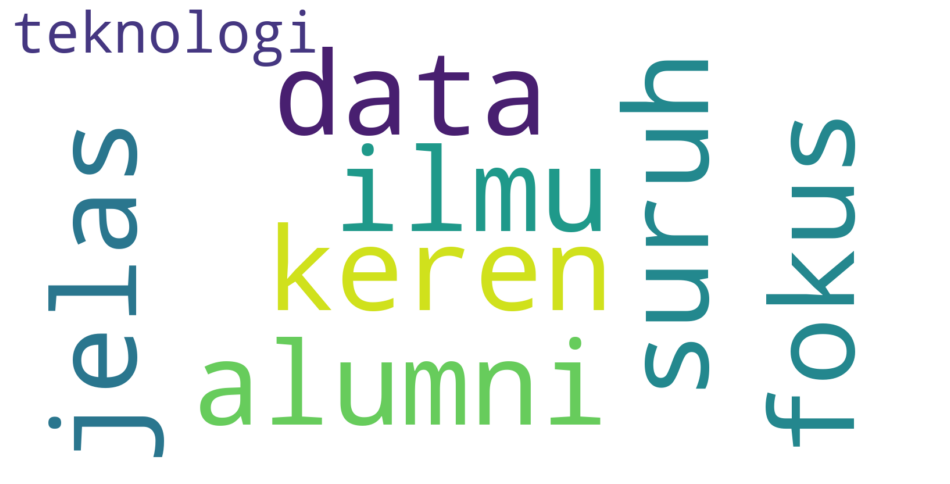

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==3]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

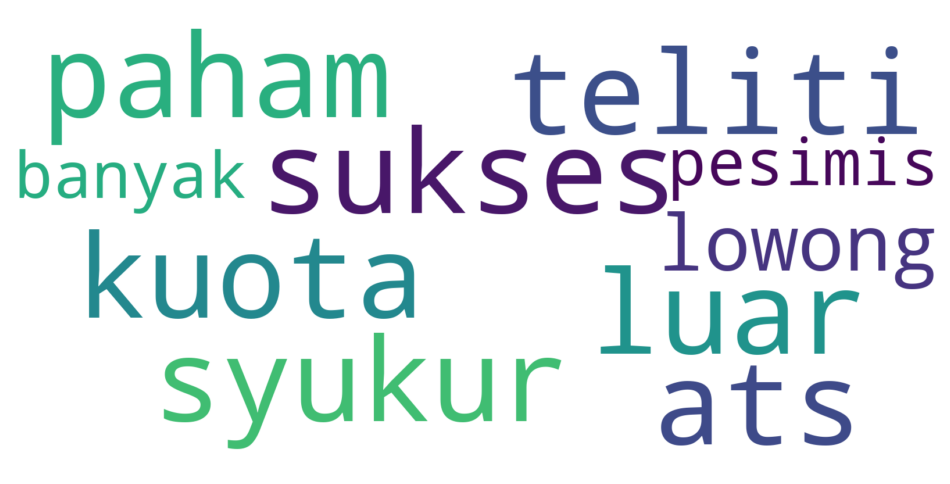

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==4]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

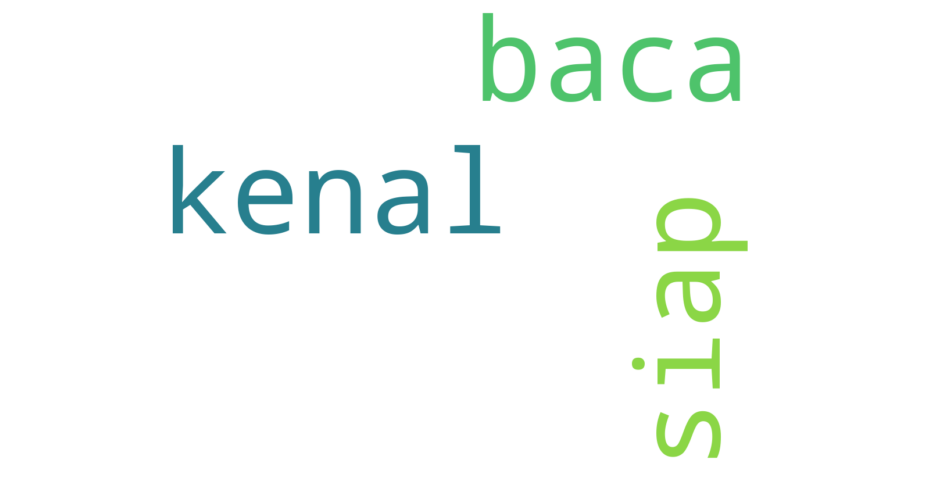

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==5]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

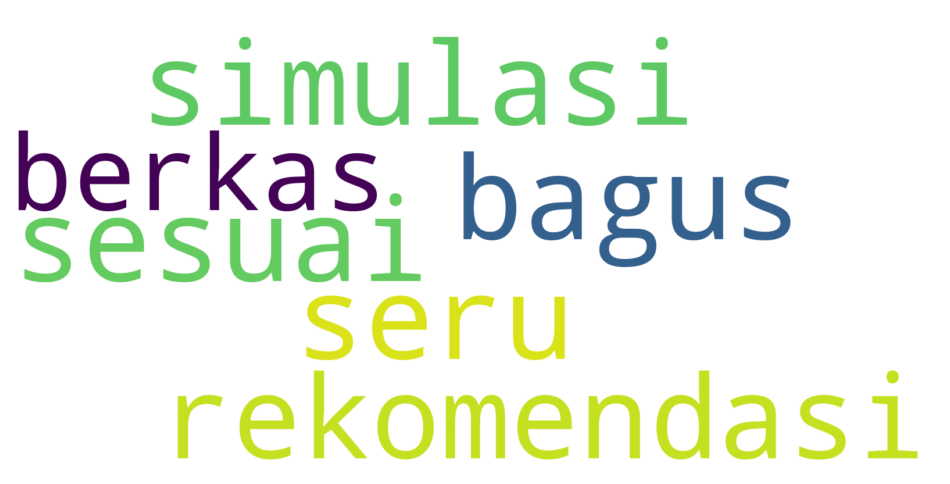

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==6]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

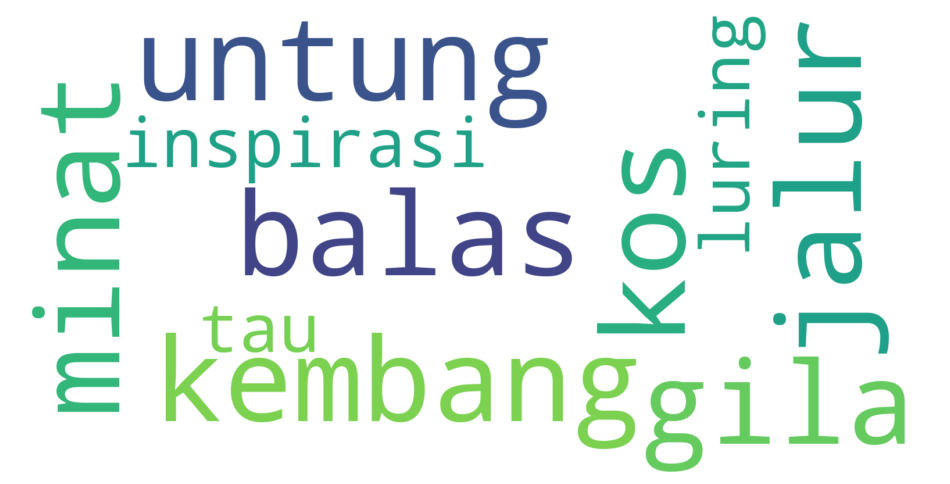

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==7]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

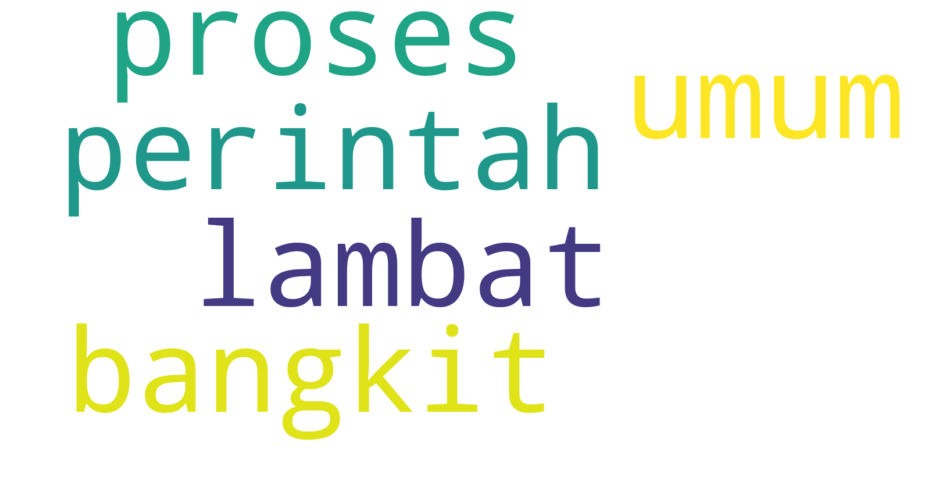

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==8]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

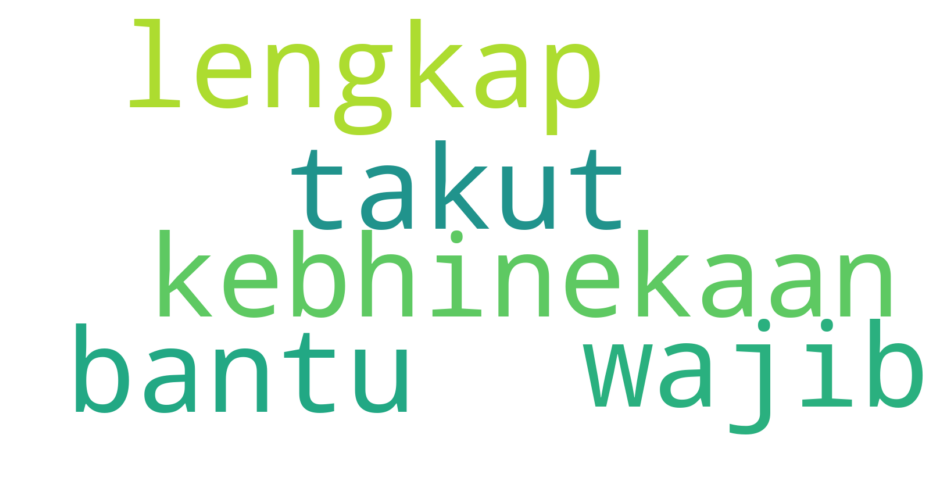

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==9]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

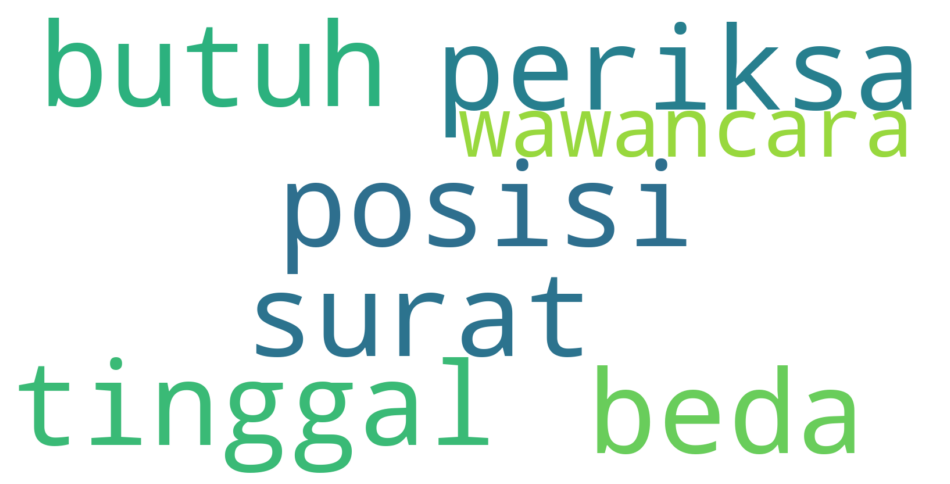

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==10]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

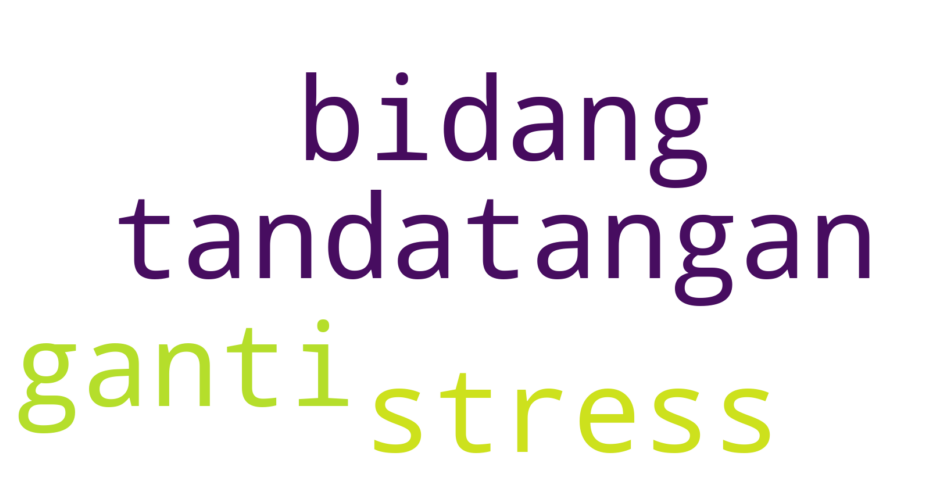

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==11]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

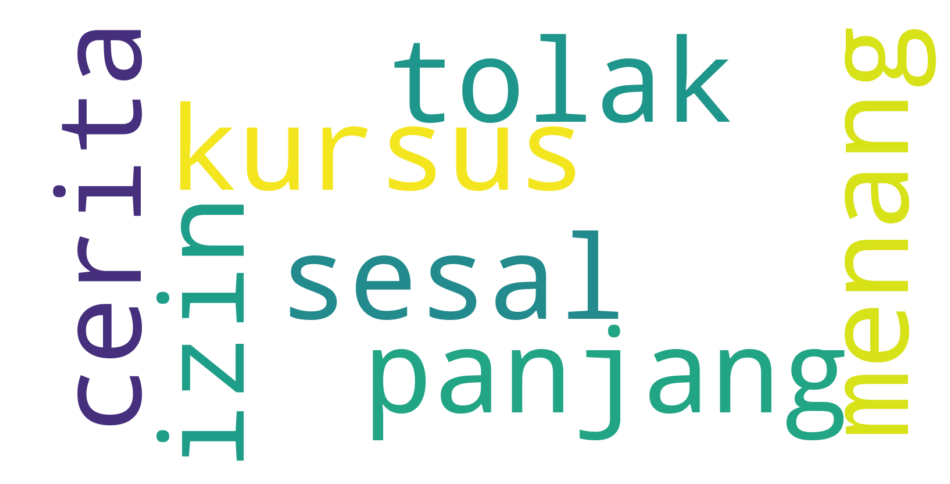

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==12]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

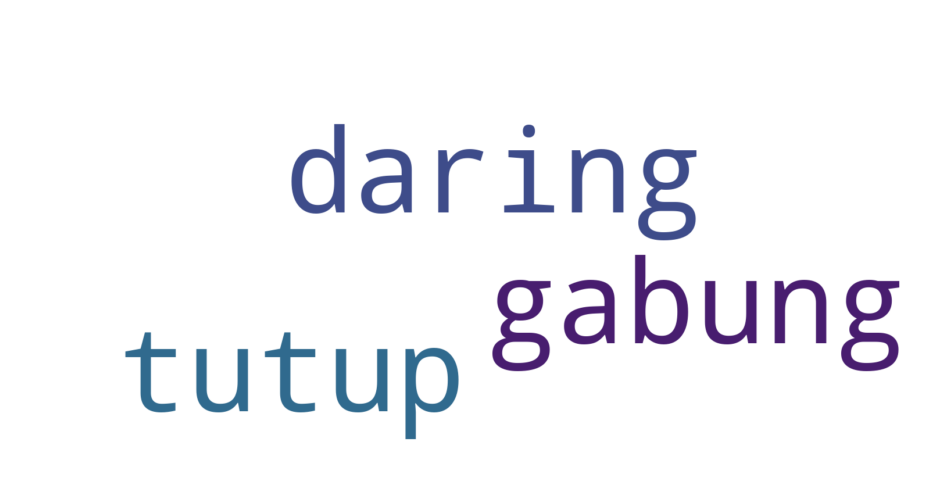

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==13]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

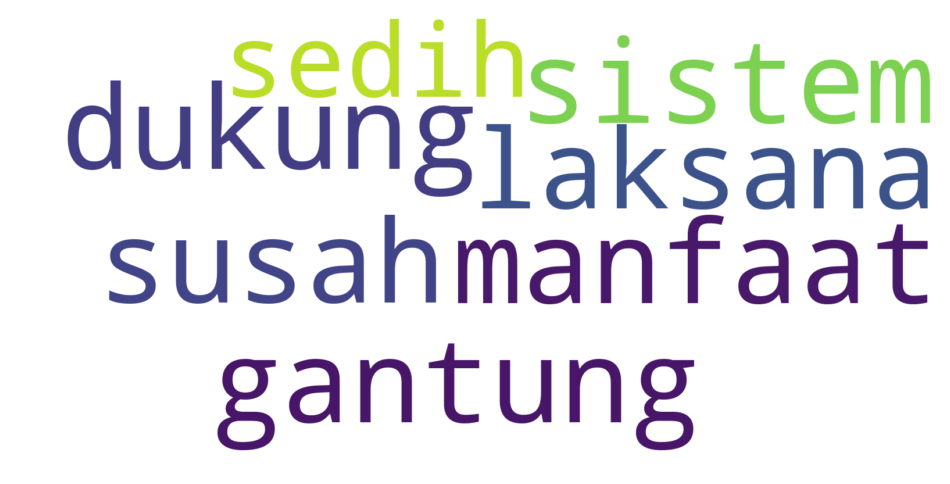

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==14]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

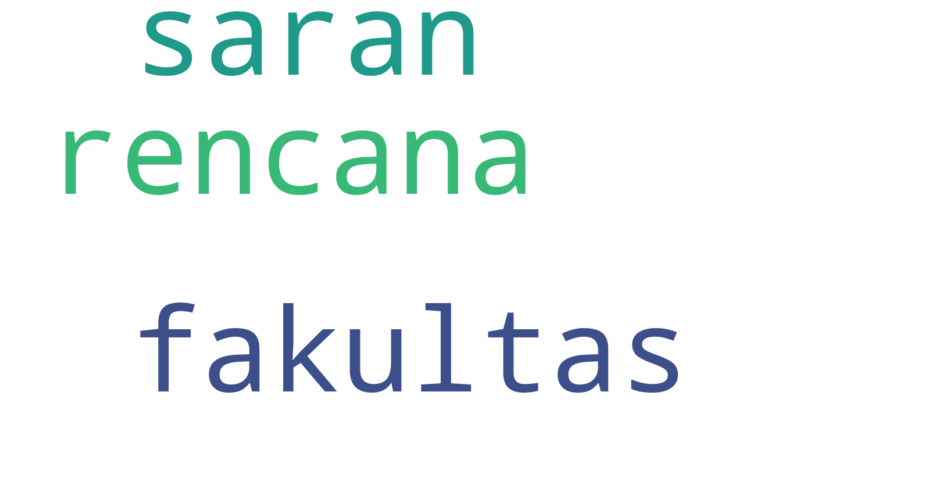

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==15]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

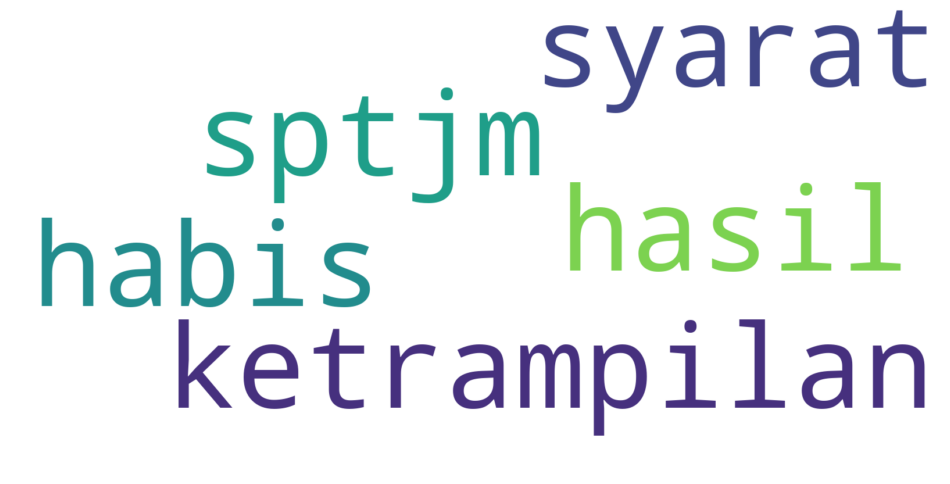

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==16]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

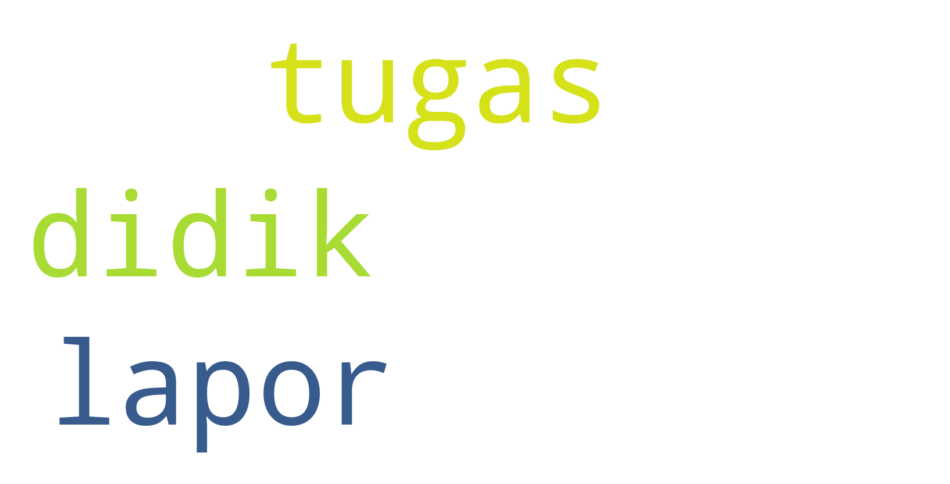

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==17]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

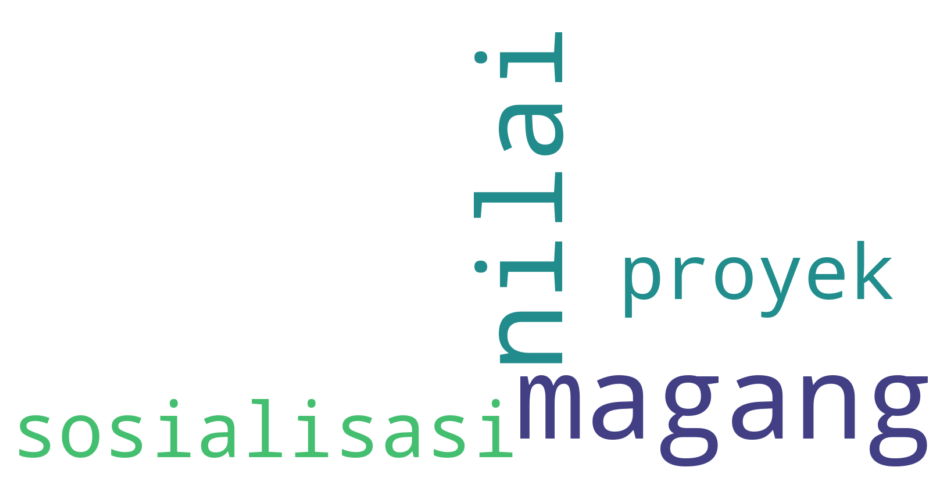

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==18]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

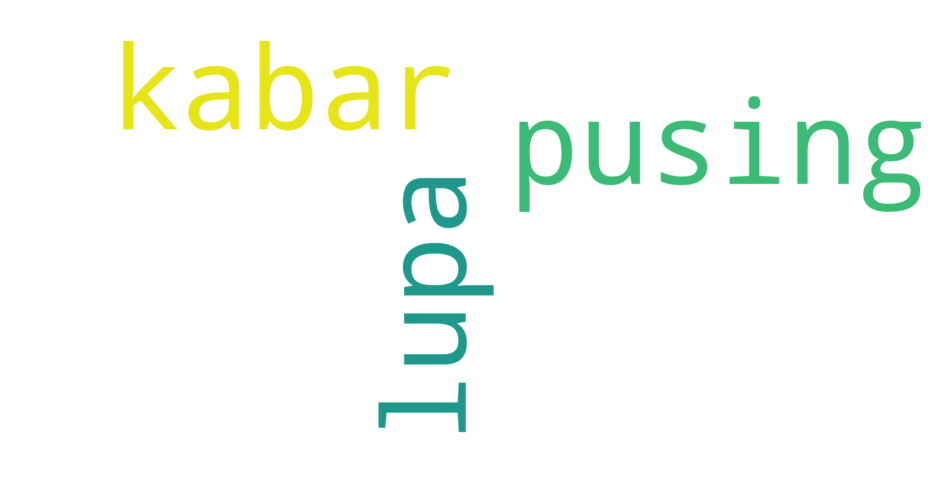

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==19]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

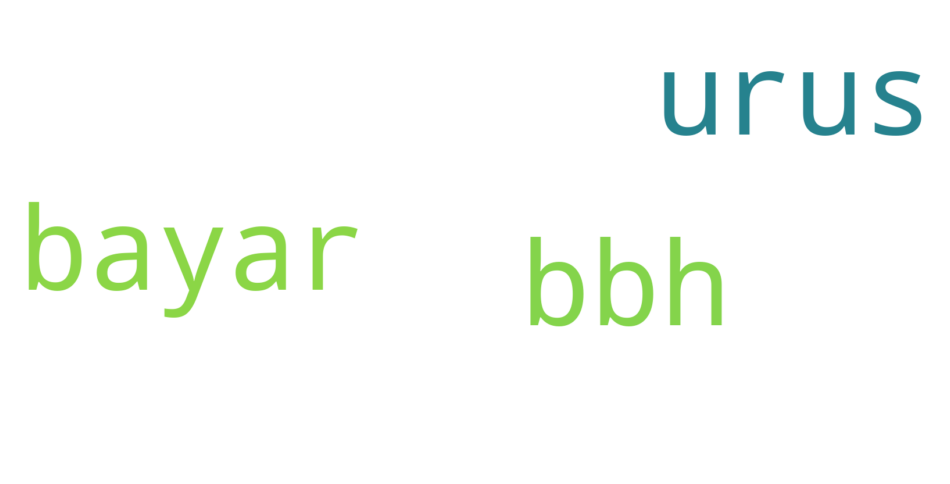

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

cluster = table_tfidf4[table_tfidf4['cluster']==20]
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,
background_color='white'). generate_from_frequencies(cluster.set_index('terms')['tfidf'])

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()